In [195]:
import pandas as pd
%matplotlib inline
import seaborn as sns
from matplotlib import pyplot as plt

In [196]:
rawData = pd.read_csv('xAPI-Edu-Data.csv')

In [197]:
rawData.tail().T

,475,476,477,478,479
gender,F,F,F,F,F
NationalITy,Jordan,Jordan,Jordan,Jordan,Jordan
PlaceofBirth,Jordan,Jordan,Jordan,Jordan,Jordan
StageID,MiddleSchool,MiddleSchool,MiddleSchool,MiddleSchool,MiddleSchool
GradeID,G-08,G-08,G-08,G-08,G-08
SectionID,A,A,A,A,A
Topic,Chemistry,Geology,Geology,History,History
Semester,S,F,S,F,S
Relation,Father,Father,Father,Father,Father
raisedhands,5,50,55,30,35


In [198]:
rawData.columns

Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands',
       'VisITedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class'],
      dtype='object')

In [199]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 0 to 479
Data columns (total 17 columns):
gender                      480 non-null object
NationalITy                 480 non-null object
PlaceofBirth                480 non-null object
StageID                     480 non-null object
GradeID                     480 non-null object
SectionID                   480 non-null object
Topic                       480 non-null object
Semester                    480 non-null object
Relation                    480 non-null object
raisedhands                 480 non-null int64
VisITedResources            480 non-null int64
AnnouncementsView           480 non-null int64
Discussion                  480 non-null int64
ParentAnsweringSurvey       480 non-null object
ParentschoolSatisfaction    480 non-null object
StudentAbsenceDays          480 non-null object
Class                       480 non-null object
dtypes: int64(4), object(13)
memory usage: 67.5+ KB


In [200]:
rawData.describe()

,raisedhands,VisITedResources,AnnouncementsView,Discussion
count,480.000000,480.000000,480.000000,480.000000
mean,46.775000,54.797917,37.918750,43.283333
std,30.779223,33.080007,26.611244,27.637735
min,0.000000,0.000000,0.000000,1.000000
25%,15.750000,20.000000,14.000000,20.000000
50%,50.000000,65.000000,33.000000,39.000000
75%,75.000000,84.000000,58.000000,70.000000
max,100.000000,99.000000,98.000000,99.000000


In [201]:
cat_Vars = ['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID', 'Topic', 'Semester', 'StudentAbsenceDays']

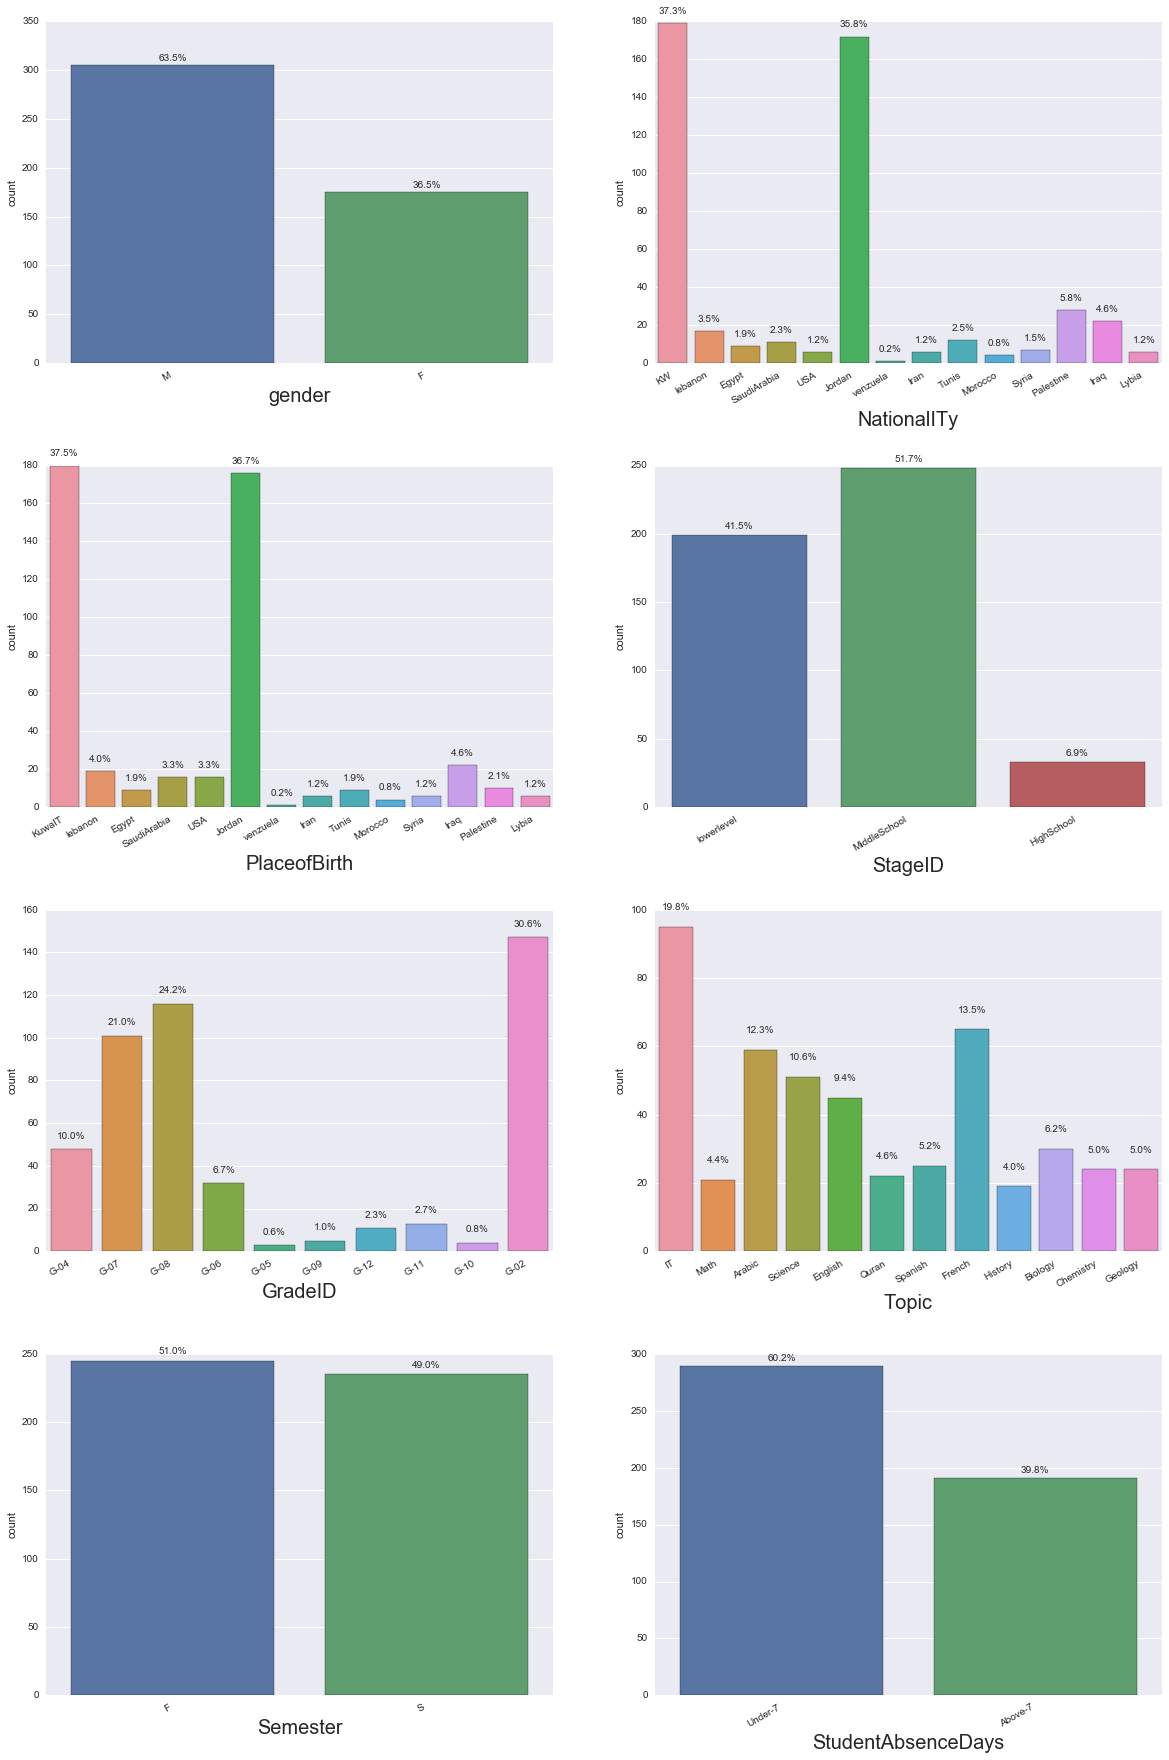

In [202]:
fig = plt.figure(figsize=(20, 30))
fig.subplots_adjust(hspace=.3, wspace=0.2)

for i in range(1,len(cat_Vars)+1,1):
    ax = fig.add_subplot(4, 2, i,)
    sns.countplot(rawData[cat_Vars[i-1]])
    ax.xaxis.label.set_size(20)
    plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
    total = float(len(rawData))
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,height + 5,'{:1.1f}%'.format(100 * height/total),ha="center")


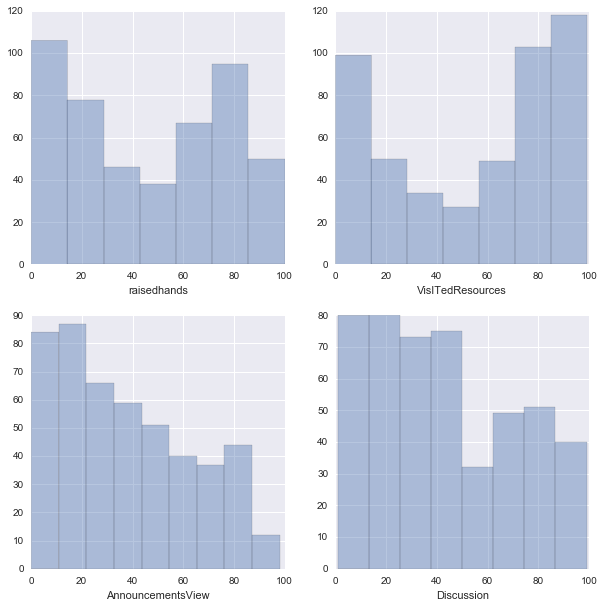

In [203]:
num_Vars = [ 'raisedhands','VisITedResources', 'AnnouncementsView', 'Discussion']

fig = plt.figure(figsize=(10, 10))
for i in range(1,len(num_Vars)+1,1):
    ax = fig.add_subplot(2, 2, i)
    sns.distplot(rawData[num_Vars[i-1]],kde= None)

In [204]:
import scipy.stats

In [205]:
scipy.stats.pearsonr(rawData['AnnouncementsView'],rawData['VisITedResources'])

(0.5945000269505788, 3.3364027394608858e-47)

In [116]:
y = rawData['Class']
rawData.drop(rawData[['Relation', 'ParentAnsweringSurvey', 'ParentschoolSatisfaction','Class']], axis=1, inplace=True)
X = pd.get_dummies(rawData)

In [206]:
y = rawData['Class']
rawData = rawData[[ 'raisedhands','VisITedResources', 'AnnouncementsView', 'Discussion']]
#rawData.drop(rawData[['Relation', 'ParentAnsweringSurvey', 'ParentschoolSatisfaction','Class']], axis=1, inplace=True)
X = pd.get_dummies(rawData)

In [207]:
rawData.columns

Index(['raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion'], dtype='object')

In [208]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
y = le.fit_transform(y)

In [232]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train.shape, X_test.shape

# from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# knn = KNeighborsClassifier(n_neighbors=15)
# knn.fit(X_train, y_train)
# y_pred = knn.predict(X_test)
# accuracy_score(y_test, y_pred)

import xgboost as xgb

xg_train = xgb.DMatrix(X_train, label=y_train)
xg_test = xgb.DMatrix(X_test, label=y_test)

In [239]:
param = {}
# use softmax multi-class classification
param['objective'] = 'multi:softmax'
# scale weight of positive examples
param['eta'] = 0.15
param['max_depth'] = 3
param['silent'] = 1
param['nthread'] = 3
param['num_class'] = 3

#watchlist = [ (xg_train,'train'), (xg_test, 'test') ]
num_round = 10
bst = xgb.train(param, xg_train, num_round)
# get prediction
pred = bst.predict( xg_test ).astype(int)

In [240]:
print(accuracy_score(y_test, pred))
bst.get_fscore()

0.575


{'AnnouncementsView': 50,
 'Discussion': 29,
 'VisITedResources': 60,
 'raisedhands': 53}

In [220]:
le.inverse_transform(pred)

array(['H', 'H', 'H', 'H', 'M', 'L', 'H', 'L', 'L', 'M', 'M', 'L', 'M',
       'H', 'M', 'M', 'H', 'M', 'L', 'M', 'H', 'H', 'H', 'L', 'L', 'H',
       'M', 'M', 'H', 'M', 'L', 'M', 'M', 'L', 'L', 'H', 'M', 'H', 'H',
       'M', 'H', 'M', 'L', 'M', 'M', 'H', 'H', 'L', 'L', 'H', 'M', 'H',
       'M', 'M', 'L', 'M', 'H', 'M', 'L', 'L', 'L', 'M', 'M', 'M', 'M',
       'H', 'L', 'L', 'M', 'L', 'L', 'M', 'M', 'M', 'L', 'M', 'M', 'M',
       'L', 'M', 'L', 'M', 'H', 'L', 'L', 'H', 'L', 'M', 'L', 'L', 'L',
       'M', 'L', 'L', 'H', 'M', 'H', 'L', 'M', 'M', 'M', 'H', 'H', 'M',
       'L', 'H', 'L', 'H', 'L', 'H', 'M', 'M', 'M', 'M', 'H', 'H', 'M',
       'M', 'L', 'L'], dtype=object)

In [125]:
from sklearn.metrics import confusion_matrix

In [126]:
confusion_matrix(y_test, pred)

array([[21,  0, 11],
       [ 0, 23,  3],
       [16,  9, 37]])

In [133]:
bst.get_fscore()

{'AnnouncementsView': 330,
 'Discussion': 250,
 'GradeID_G-02': 22,
 'GradeID_G-04': 10,
 'GradeID_G-06': 12,
 'GradeID_G-07': 15,
 'GradeID_G-08': 15,
 'GradeID_G-11': 3,
 'GradeID_G-12': 1,
 'NationalITy_Iran': 2,
 'NationalITy_Iraq': 16,
 'NationalITy_Jordan': 60,
 'NationalITy_KW': 26,
 'NationalITy_Morocco': 3,
 'NationalITy_Palestine': 18,
 'NationalITy_SaudiArabia': 7,
 'PlaceofBirth_Jordan': 13,
 'PlaceofBirth_KuwaIT': 9,
 'PlaceofBirth_SaudiArabia': 6,
 'PlaceofBirth_Tunis': 1,
 'PlaceofBirth_USA': 7,
 'SectionID_A': 10,
 'SectionID_B': 40,
 'SectionID_C': 16,
 'Semester_F': 35,
 'StageID_HighSchool': 2,
 'StageID_MiddleSchool': 17,
 'StageID_lowerlevel': 16,
 'StudentAbsenceDays_Above-7': 90,
 'Topic_Arabic': 17,
 'Topic_Chemistry': 3,
 'Topic_English': 18,
 'Topic_French': 23,
 'Topic_Geology': 29,
 'Topic_History': 9,
 'Topic_IT': 24,
 'Topic_Math': 34,
 'Topic_Quran': 6,
 'Topic_Science': 4,
 'Topic_Spanish': 2,
 'VisITedResources': 336,
 'gender_F': 43,
 'raisedhands': 34